In [1]:
import pandas as pd
import numpy as np
import random 

In [2]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import datetime as dt
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import squarify
from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel('RFM_Exercise_data.xlsx')

In [4]:
df.head()

,CUST_ID,Gender,Tot_Dollars,Last_Pur,Num_Pur,Flag_express,Flag_multibuyer,Flag_BigCity,Last_response
0,2194540,1,15,26,1,0,0,0,0
1,2194586,0,418,6,11,0,0,0,1
2,2194908,1,388,24,9,1,0,1,0
3,2195000,1,325,12,7,1,0,1,0
4,2195161,0,350,4,9,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CUST_ID          50000 non-null  int64
 1   Gender           50000 non-null  int64
 2   Tot_Dollars      50000 non-null  int64
 3   Last_Pur         50000 non-null  int64
 4   Num_Pur          50000 non-null  int64
 5   Flag_express     50000 non-null  int64
 6   Flag_multibuyer  50000 non-null  int64
 7   Flag_BigCity     50000 non-null  int64
 8   Last_response    50000 non-null  int64
dtypes: int64(9)
memory usage: 3.4 MB


In [155]:
# Import libraries
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as ct
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt 
plt.style.use('default')
plt.style.use ('seaborn-darkgrid')

### Performing ANOVA Test on Recency, Frequency and Monetary 

In [158]:
last_res_group = pd.unique(df.Last_response.values)
last_res_group

array([0, 1], dtype=int64)

In [162]:
statsdata_r = {grp: df['Last_Pur'][df['Last_response'] == grp] for grp in last_res_group}

In [163]:
stats.f_oneway(statsdata_r[0], statsdata_r[1])

F_onewayResult(statistic=1072.282673489664, pvalue=1.0220353505178646e-232)

In [164]:
statsdata_f = {grp: df['Num_Pur'][df['Last_response'] == grp] for grp in last_res_group}

In [165]:
stats.f_oneway(statsdata_f[0], statsdata_f[1])

F_onewayResult(statistic=737.2685448842627, pvalue=3.497781018229012e-161)

In [166]:
statsdata_m = {grp: df['Tot_Dollars'][df['Last_response'] == grp] for grp in last_res_group}

In [167]:
stats.f_oneway(statsdata_m[0], statsdata_m[1])

F_onewayResult(statistic=328.85902723577476, pvalue=2.9277980031198656e-73)

In [7]:
df.isna().sum()

CUST_ID            0
Gender             0
Tot_Dollars        0
Last_Pur           0
Num_Pur            0
Flag_express       0
Flag_multibuyer    0
Flag_BigCity       0
Last_response      0
dtype: int64

### Performing t-test on frequency, recency and monetary

In [8]:
import scipy.stats as stats
sample1=df[df["Last_response"]==1]["Last_Pur"]
sample2=df[df["Last_response"]==0]["Last_Pur"]
t_stat, p_val=stats.ttest_ind(sample1,sample2)
print(t_stat)
print(p_val)

-32.745727560853865
1.0220353505113803e-232


In [9]:
import scipy.stats as stats
sample1=df[df["Last_response"]==1]["Num_Pur"]
sample2=df[df["Last_response"]==0]["Num_Pur"]
t_stat, p_val=stats.ttest_ind(sample1,sample2)
print(t_stat)
print(p_val)

27.15268945950407
3.4977810182018486e-161


In [10]:
import scipy.stats as stats
sample1=df[df["Last_response"]==1]["Tot_Dollars"]
sample2=df[df["Last_response"]==0]["Tot_Dollars"]
t_stat, p_val=stats.ttest_ind(sample1,sample2)
print(t_stat)
print(p_val)

18.134470690808
2.927798003105247e-73


In [11]:
df.columns

Index(['CUST_ID', 'Gender', 'Tot_Dollars', 'Last_Pur', 'Num_Pur',
       'Flag_express', 'Flag_multibuyer', 'Flag_BigCity', 'Last_response'],
      dtype='object')

### Using models to identify feature importance for last response variable

In [12]:
model=LogisticRegression(random_state=1)
 
features = df[['Tot_Dollars', 'Last_Pur', 'Num_Pur']]
 
model.fit(features,df['Last_response'])
 
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
 

,feature,feature_importance
2,Num_Pur,0.096425
1,Last_Pur,0.082083
0,Tot_Dollars,0.000878


In [13]:
model=smf.logit('Last_response~Num_Pur+Last_Pur+Tot_Dollars',data=df)
result = model.fit()
 
feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]

Optimization terminated successfully.
         Current function value: 0.284097
         Iterations 7


,absolute_coefficients
Num_Pur,0.106065
Last_Pur,0.077056
Tot_Dollars,0.001238


### Finding model performance 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [15]:
X = df[['Tot_Dollars', 'Last_Pur', 'Num_Pur']]
y = df[['Last_response']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [17]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19240/427270506.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier()

In [18]:
y_pred_test = forest.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred_test)

0.88048

In [20]:
confusion_matrix(y_test, y_pred_test)

array([[10905,   464],
       [ 1030,   101]], dtype=int64)

### RFM Customer Segmentation - Preprocessing and Analysis

In [21]:
# Import libraries
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify

In [23]:
rfm_table = df.copy()

In [24]:
rfm_table.head(1)

,CUST_ID,Gender,Tot_Dollars,Last_Pur,Num_Pur,Flag_express,Flag_multibuyer,Flag_BigCity,Last_response
0,2194540,1,15,26,1,0,0,0,0


In [27]:
rfm_table = rfm_table.rename(columns={'CUST_ID': 'Cap User ID', 'Tot_Dollars': 'Monetary','Last_Pur':"Recency","Num_Pur":"Frequency"})

In [28]:
rfm_table.head()

,Cap User ID,Gender,Monetary,Recency,Frequency,Flag_express,Flag_multibuyer,Flag_BigCity,Last_response
0,2194540,1,15,26,1,0,0,0,0
1,2194586,0,418,6,11,0,0,0,1
2,2194908,1,388,24,9,1,0,1,0
3,2195000,1,325,12,7,1,0,1,0
4,2195161,0,350,4,9,0,0,0,0


In [29]:
rfm_table = rfm_table.drop([ 'Gender', 'Flag_express',
       'Flag_multibuyer', 'Flag_BigCity', 'Last_response'], axis=1)

In [30]:
rfm_table.head()

,Cap User ID,Monetary,Recency,Frequency
0,2194540,15,26,1
1,2194586,418,6,11
2,2194908,388,24,9
3,2195000,325,12,7
4,2195161,350,4,9


### Finding the appropriate amount of clusters for segmentation using kmeans clustering

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19240/802817556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_recency["clusters"] = kmeans.labels_
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19240/802817556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_recency["clusters"] = kmeans.labels_
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19240/802817556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

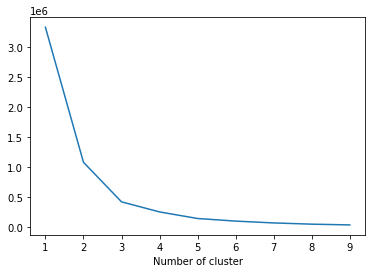

In [32]:
#Finding Optimum Clusters
sse={}
tx_recency = rfm_table[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

#### Function for ordering clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final
  
#Recency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_table[['Recency']])
rfm_table['RecencyCluster']=kmeans.predict(rfm_table[['Recency']])
rfm_table = order_cluster('RecencyCluster','Recency', rfm_table, False)

#Frequency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_table[['Frequency']])
rfm_table['FrequencyCluster']=kmeans.predict(rfm_table[['Frequency']])
rfm_table = order_cluster('FrequencyCluster','Frequency', rfm_table, True)

#Monetary Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_table[['Monetary']])
rfm_table['MonetaryCluster']=kmeans.predict(rfm_table[['Monetary']])
rfm_table = order_cluster('MonetaryCluster','Monetary', rfm_table, True)

# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Creating Recency Custer Tag Column
c=rfm_table.groupby('RecencyCluster')['Recency'].agg(['min','max','mean']).reset_index()
r1='<='+str(c.iloc[2,2]) 
r2=str(c.iloc[1,1])+' to '+str(c.iloc[1,2]) 
r3='>='+str(c.iloc[0,1])
# Create the dictionary 
R ={0 : r3, 1 : r2, 2 : r1} 
rfm_table['RecencyClusterTag']=rfm_table['RecencyCluster'].apply(set_value, args =(R, )) 

# Creating Frequency Custer Tag Column
a=rfm_table.groupby('FrequencyCluster')['Frequency'].agg(['min','max','mean']).reset_index()
f1='<='+str(a.iloc[0,2]) 
f2=str(a.iloc[1,1])+' to '+str(a.iloc[1,2]) 
f3='>='+str(a.iloc[2,1])
# Create the dictionary 
F ={0 : f1, 1 : f2, 2 :f3} 
rfm_table['FrequencyClusterTag']=rfm_table['FrequencyCluster'].apply(set_value, args =(F, )) 

# Creating Monetary Custer Tag Column
b=rfm_table.groupby('MonetaryCluster')['Monetary'].agg(['min','max','mean']).reset_index()
m1='<='+str(int(round(b.iloc[0,2]))) 
m2=str(int(round(b.iloc[0,2])+1))+' to '+str(int(round(b.iloc[1,2]))) 
m3='>='+str(int(round(b.iloc[1,2])+1))
# Create the dictionary 
M ={0 : m1, 1 : m2, 2 :m3} 
rfm_table['MonetaryClusterTag']=rfm_table['MonetaryCluster'].apply(set_value, args =(M, )) 

rfm_table["FrequencyClusterTag"] = rfm_table["FrequencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[f1, f2, f3]))
rfm_table["MonetaryClusterTag"] = rfm_table["MonetaryClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[m1, m2,m3]))
rfm_table["RecencyClusterTag"] = rfm_table["RecencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[r1, r2,r3]))

##### you can observe from the chart above that there is a elbow formation around 3 clusters. We select 4 as the bucket size for clusters to be on the safe side. 

### Visualizing the distribution of recency, frequency and monetary variable

C:\Users\mihir\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mihir\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mihir\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

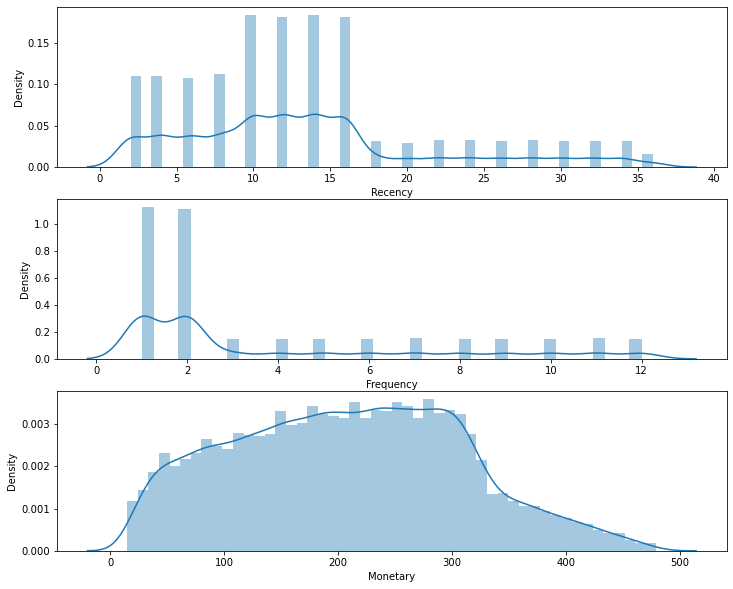

In [33]:
# Plotting RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_table['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_table['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_table['Monetary'])
# Show the plot
plt.show()

## Calculate the R, F and M scores

In [81]:
quintiles = rfm_table[['Recency', 'Frequency', 'Monetary']].quantile([.25, .5, .75]).to_dict()
quintiles

{'Recency': {0.25: 8.0, 0.5: 12.0, 0.75: 16.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 6.0},
 'Monetary': {0.25: 128.0, 0.5: 209.0, 0.75: 284.0}}

In [82]:
# Lower the Recency value better the customer remembers the brand 
def calc_r_score(x):
    if x <= quintiles['Recency'][.25]:
        return 4
    elif x <= quintiles['Recency'][.50]:
        return 3
    elif x <= quintiles['Recency'][.75]:
        return 2
    else: 
        return 1

In [83]:
# Higher the value of frequency and monteary more valuable is the customer
def calc_fm_score(x,y):
    if x <= quintiles[y][.25]:
        return 1
    elif x <= quintiles[y][.50]:
        return 2
    elif x <= quintiles[y][.75]:
        return 3
    else:
        return 4

In [84]:
rfm_table['r'] = rfm_table['Recency'].apply(lambda x: calc_r_score(x))
rfm_table['f'] = rfm_table['Frequency'].apply(lambda x: calc_fm_score(x, 'Frequency'))
rfm_table['m'] = rfm_table['Monetary'].apply(lambda x: calc_fm_score(x, 'Monetary'))

In [85]:
rfm_table.head()

,Cap User ID,Monetary,Recency,Frequency,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat
0,2194540,15,26,1,0,0,0,>=22,<=3,<=150,1,1,1,111
1,2198496,117,24,2,0,0,0,>=22,<=3,<=150,1,2,1,122
2,2200267,133,32,2,0,0,0,>=22,<=3,<=150,1,2,2,122
3,2200359,96,26,2,0,0,0,>=22,<=3,<=150,1,2,1,121
4,2200842,72,28,1,0,0,0,>=22,<=3,<=150,1,1,1,111


In [86]:
df_r = rfm_table.groupby('r')['Cap User ID'].nunique()
df_f = rfm_table.groupby('f')['Cap User ID'].nunique()
df_m = rfm_table.groupby('m')['Cap User ID'].nunique()

<AxesSubplot:xlabel='r'>

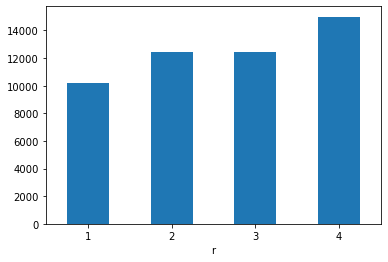

In [87]:
df_r.plot.bar(rot=0)

In [88]:
df_f

f
1    15120
2    14935
3     7984
4    11961
Name: Cap User ID, dtype: int64

<AxesSubplot:xlabel='f'>

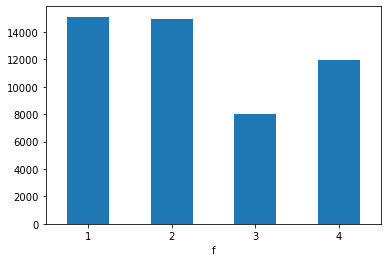

In [89]:
df_f.plot.bar(rot=0)

In [90]:
df_m

m
1    12515
2    12608
3    12530
4    12347
Name: Cap User ID, dtype: int64

<AxesSubplot:xlabel='m'>

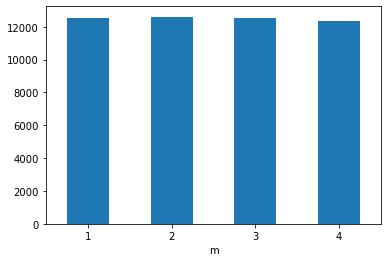

In [91]:
df_m.plot.bar(rot=0)

In [92]:
def join_rfm(x): return str(x['r']) + str(x['f']) + str(x['m'])
rfm_table['RFM_Concat'] = rfm_table.apply(join_rfm, axis=1)
rfm_new = rfm_table.copy()
rfm_new.head()

,Cap User ID,Monetary,Recency,Frequency,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat
0,2194540,15,26,1,0,0,0,>=22,<=3,<=150,1,1,1,111
1,2198496,117,24,2,0,0,0,>=22,<=3,<=150,1,2,1,121
2,2200267,133,32,2,0,0,0,>=22,<=3,<=150,1,2,2,122
3,2200359,96,26,2,0,0,0,>=22,<=3,<=150,1,2,1,121
4,2200842,72,28,1,0,0,0,>=22,<=3,<=150,1,1,1,111


In [93]:
# Count num of unique segments
FMCG_rfm_count_unique = rfm_new.groupby('RFM_Concat')['RFM_Concat'].nunique()
print(FMCG_rfm_count_unique.sum())
# Calculate RFM_Score
rfm_new['RFM_Score'] = rfm_new[['r','f','m']].sum(axis=1)
print(rfm_new['RFM_Score'].head())

64
0    3
1    4
2    5
3    4
4    3
Name: RFM_Score, dtype: int64


In [94]:
rfm_new.head()

,Cap User ID,Monetary,Recency,Frequency,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat,RFM_Score
0,2194540,15,26,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3
1,2198496,117,24,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4
2,2200267,133,32,2,0,0,0,>=22,<=3,<=150,1,2,2,122,5
3,2200359,96,26,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4
4,2200842,72,28,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3


In [96]:
rfm_new.RFM_Score.unique()

array([ 3,  4,  5,  6,  8,  7,  9, 10, 11, 12], dtype=int64)

In [100]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'High Value Customer'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9)):
        return 'Medium Value Customer'
    elif ((df['RFM_Score'] >= 3) and (df['RFM_Score'] < 6)):
        return 'Low Value Customer'
    else:
        return 'Critical Customer'
# Create a new variable RFM_Level
rfm_new['RFM_Level'] = rfm_new.apply(rfm_level, axis=1)
# Printing the header with top 15 rows 
rfm_new.head(15)

,Cap User ID,Monetary,Recency,Frequency,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat,RFM_Score,RFM_Level
0,2194540,15,26,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
1,2198496,117,24,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer
2,2200267,133,32,2,0,0,0,>=22,<=3,<=150,1,2,2,122,5,Low Value Customer
3,2200359,96,26,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer
4,2200842,72,28,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
5,2205051,51,34,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer
6,2213262,90,24,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer
7,2218621,74,32,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer
8,2219311,22,32,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
9,2224210,114,32,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer


In [132]:
rfm_new

,Cap User ID,Monetary,Recency,Frequency,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat,RFM_Score,RFM_Level
0,2194540,15,26,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
1,2198496,117,24,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer
2,2200267,133,32,2,0,0,0,>=22,<=3,<=150,1,2,2,122,5,Low Value Customer
3,2200359,96,26,2,0,0,0,>=22,<=3,<=150,1,2,1,121,4,Low Value Customer
4,2200842,72,28,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3338905,276,10,7,1,1,2,10 to 20,4 to 8,>=270,3,4,3,343,10,High Value Customer
49996,3340331,350,10,4,1,1,2,10 to 20,4 to 8,>=270,3,3,4,334,10,High Value Customer
49997,3341964,387,16,6,1,1,2,10 to 20,4 to 8,>=270,2,3,4,234,9,High Value Customer
49998,3342608,317,12,4,1,1,2,10 to 20,4 to 8,>=270,3,3,4,334,10,High Value Customer


In [117]:
rfm_new.RFM_Concat.unique()

array(['111', '121', '122', '112', '131', '132', '422', '431', '421',
       '411', '412', '432', '212', '211', '222', '221', '321', '311',
       '331', '312', '232', '322', '332', '231', '142', '442', '342',
       '242', '141', '441', '341', '241', '123', '113', '133', '413',
       '433', '423', '313', '213', '223', '323', '333', '233', '143',
       '443', '343', '243', '114', '124', '134', '424', '414', '434',
       '224', '334', '324', '314', '214', '234', '144', '444', '244',
       '344'], dtype=object)

In [118]:
df_rfm_bucket = rfm_table.groupby('RFM_Concat')['Cap User ID'].nunique()

In [122]:
df_rfm_bucket

RFM_Concat
111    1201
112     743
113     765
114     305
121     985
       ... 
434     634
441      60
442     745
443     881
444    1942
Name: Cap User ID, Length: 64, dtype: int64

In [103]:
rfm_level_agg = rfm_new.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                      Recency Frequency Monetary       
                         mean      mean     mean  count
RFM_Level                                              
High Value Customer      10.1       7.2    297.9  16433
Low Value Customer       20.0       1.4    112.3   9978
Medium Value Customer    12.9       2.7    186.5  23589


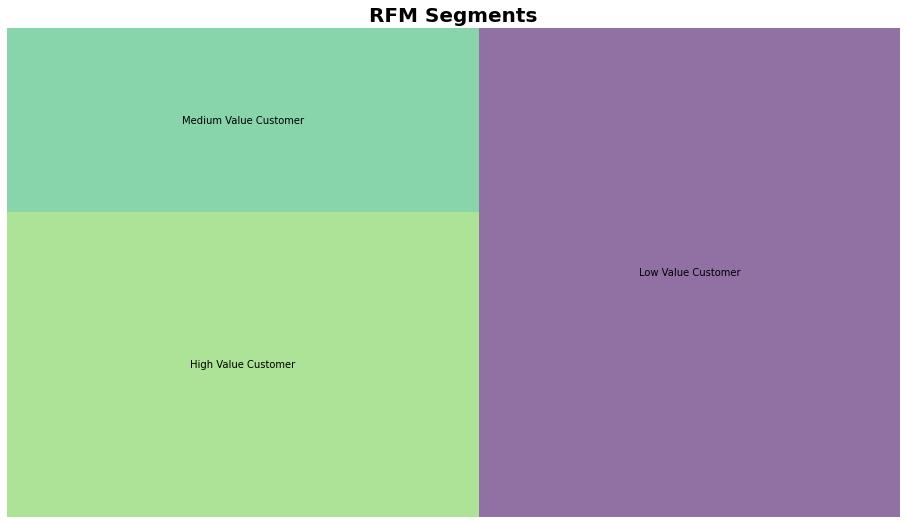

In [116]:
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['High Value Customer','Medium Value Customer', 'Low Value Customer'], alpha=.6 )
plt.title("RFM Segments",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

In [136]:
df1

,Cap User ID,Monetary,Recency,Frequency,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat,RFM_Score,RFM_Level
0,2194540,15,26,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
4,2200842,72,28,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
8,2219311,22,32,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
11,2228005,17,22,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
12,2233341,101,32,1,0,0,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13410,3316595,115,20,1,1,0,0,10 to 20,<=3,<=150,1,1,1,111,3,Low Value Customer
13461,3327428,102,18,1,1,0,0,10 to 20,<=3,<=150,1,1,1,111,3,Low Value Customer
13469,3329245,102,18,1,1,0,0,10 to 20,<=3,<=150,1,1,1,111,3,Low Value Customer
13470,3329291,40,18,1,1,0,0,10 to 20,<=3,<=150,1,1,1,111,3,Low Value Customer


In [140]:
df_cd = pd.merge(df, rfm_new, how='inner', left_on = 'CUST_ID', right_on = 'Cap User ID')

In [142]:
df_cd.head()

,CUST_ID,Gender,Tot_Dollars,Last_Pur,Num_Pur,Flag_express,Flag_multibuyer,Flag_BigCity,Last_response,Cap User ID,...,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat,RFM_Score,RFM_Level
0,2194540,1,15,26,1,0,0,0,0,2194540,...,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
1,2194586,0,418,6,11,0,0,0,1,2194586,...,2,<=8,>=9,>=270,4,4,4,444,12,High Value Customer
2,2194908,1,388,24,9,1,0,1,0,2194908,...,2,>=22,>=9,>=270,1,4,4,144,9,High Value Customer
3,2195000,1,325,12,7,1,0,1,0,2195000,...,2,10 to 20,4 to 8,>=270,3,4,4,344,11,High Value Customer
4,2195161,0,350,4,9,0,0,0,0,2195161,...,2,<=8,>=9,>=270,4,4,4,444,12,High Value Customer


In [144]:
df_new = df_cd.loc[df_cd['RFM_Concat']=="111"]
df_new.shape

(1201, 25)

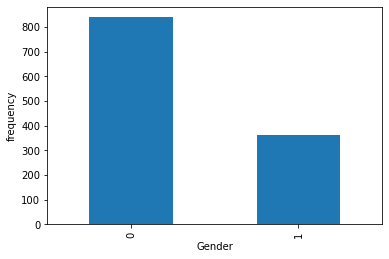

In [147]:
fig, ax = plt.subplots()
df_new['Gender'].value_counts().plot(ax=ax, kind='bar', xlabel='Gender', ylabel='frequency')
plt.show()

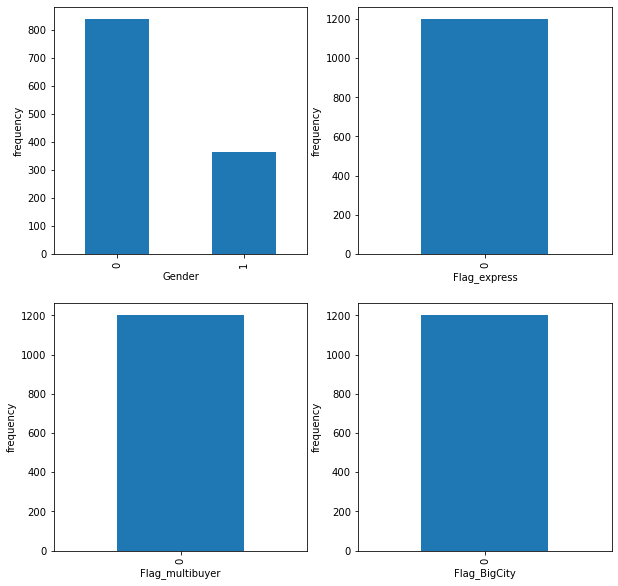

In [152]:
fig, ax = plt.subplots(2,2)
df_new['Gender'].value_counts().plot(ax=ax[0,0], kind='bar', xlabel='Gender', ylabel='frequency',figsize=(10,10))
df_new['Flag_express'].value_counts().plot(ax=ax[0,1], kind='bar', xlabel='Flag_express', ylabel='frequency')
df_new['Flag_multibuyer'].value_counts().plot(ax=ax[1,0], kind='bar', xlabel='Flag_multibuyer', ylabel='frequency')
df_new['Flag_BigCity'].value_counts().plot(ax=ax[1,1], kind='bar', xlabel='Flag_BigCity', ylabel='frequency')
plt.show()

In [153]:
df_new_1 = df_cd.loc[df_cd['RFM_Concat']=="444"]
df_new_1.shape

(1942, 25)

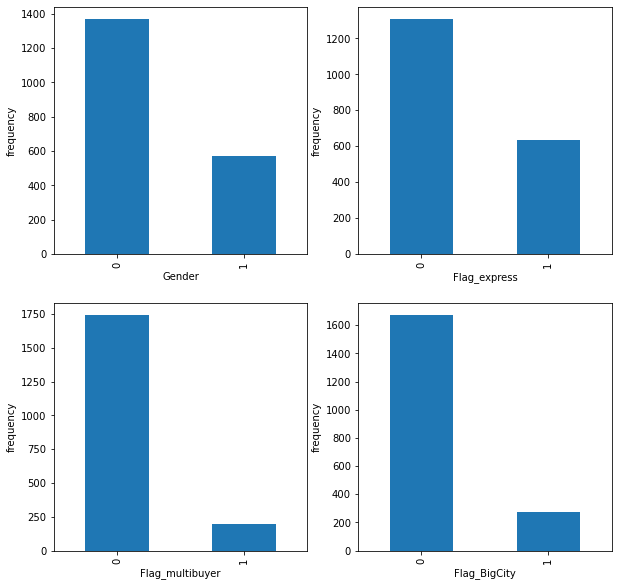

In [154]:
fig, ax = plt.subplots(2,2)
df_new_1['Gender'].value_counts().plot(ax=ax[0,0], kind='bar', xlabel='Gender', ylabel='frequency',figsize=(10,10))
df_new_1['Flag_express'].value_counts().plot(ax=ax[0,1], kind='bar', xlabel='Flag_express', ylabel='frequency')
df_new_1['Flag_multibuyer'].value_counts().plot(ax=ax[1,0], kind='bar', xlabel='Flag_multibuyer', ylabel='frequency')
df_new_1['Flag_BigCity'].value_counts().plot(ax=ax[1,1], kind='bar', xlabel='Flag_BigCity', ylabel='frequency')
plt.show()

In [168]:
df_cd.head()

,CUST_ID,Gender,Tot_Dollars,Last_Pur,Num_Pur,Flag_express,Flag_multibuyer,Flag_BigCity,Last_response,Cap User ID,...,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,r,f,m,RFM_Concat,RFM_Score,RFM_Level
0,2194540,1,15,26,1,0,0,0,0,2194540,...,0,>=22,<=3,<=150,1,1,1,111,3,Low Value Customer
1,2194586,0,418,6,11,0,0,0,1,2194586,...,2,<=8,>=9,>=270,4,4,4,444,12,High Value Customer
2,2194908,1,388,24,9,1,0,1,0,2194908,...,2,>=22,>=9,>=270,1,4,4,144,9,High Value Customer
3,2195000,1,325,12,7,1,0,1,0,2195000,...,2,10 to 20,4 to 8,>=270,3,4,4,344,11,High Value Customer
4,2195161,0,350,4,9,0,0,0,0,2195161,...,2,<=8,>=9,>=270,4,4,4,444,12,High Value Customer


### Finding profitable RFM segments (bins)

In [178]:
g1 = df_cd.groupby(['RFM_Concat', 'Last_response']).size().reset_index(name='count')
g1

,RFM_Concat,Last_response,count
0,111,0,1187
1,111,1,14
2,112,0,729
3,112,1,14
4,113,0,744
...,...,...,...
122,442,1,146
123,443,0,678
124,443,1,203
125,444,0,1514


In [185]:
final_df = g1.groupby(["RFM_Concat", "Last_response"])\
.agg({"count" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["RFM_Concat", "Last_response","count"], ascending=[True, True, False]).reset_index()

In [186]:
final_df.head()

,RFM_Concat,Last_response,count
0,111,0,98.834305
1,111,1,1.165695
2,112,0,98.115747
3,112,1,1.884253
4,113,0,97.254902


In [187]:
type(final_df)

pandas.core.frame.DataFrame

In [188]:
final_df.columns

Index(['RFM_Concat', 'Last_response', 'count'], dtype='object')

In [189]:
final_df = final_df.rename(columns={'count': 'Response_rate(%)'})

In [190]:
final_df.head()

,RFM_Concat,Last_response,Response_rate(%)
0,111,0,98.834305
1,111,1,1.165695
2,112,0,98.115747
3,112,1,1.884253
4,113,0,97.254902


In [195]:
final_df1 = final_df.loc[final_df['Last_response'] == 1].reset_index()

In [196]:
final_df1.RFM_Concat.unique()

array(['111', '112', '113', '114', '121', '122', '123', '124', '131',
       '132', '133', '134', '142', '143', '144', '211', '212', '213',
       '214', '221', '222', '223', '224', '231', '232', '233', '234',
       '241', '242', '243', '244', '311', '312', '313', '314', '321',
       '322', '323', '324', '331', '332', '333', '334', '341', '342',
       '343', '344', '411', '412', '413', '414', '421', '422', '423',
       '424', '431', '432', '433', '434', '441', '442', '443', '444'],
      dtype=object)

In [197]:
count_bin = df_cd.groupby(['RFM_Concat']).size().reset_index(name='counts')

In [205]:
count_bin.head()

,RFM_Concat,counts
0,111,1201
1,112,743
2,113,765
3,114,305
4,121,985


In [206]:
final_df1.head()

,index,RFM_Concat,Last_response,Response_rate(%)
0,1,111,1,1.165695
1,3,112,1,1.884253
2,5,113,1,2.745098
3,7,114,1,1.639344
4,9,121,1,1.928934


In [210]:
df_final = pd.merge(final_df1, count_bin, how='inner', left_on = 'RFM_Concat', right_on = 'RFM_Concat')
df_final.reset_index(drop=True, inplace=True)

In [212]:
df_final.columns

Index(['index', 'RFM_Concat', 'Last_response', 'Response_rate(%)', 'counts'], dtype='object')

In [213]:
df_final.drop(['index'], axis=1)

,RFM_Concat,Last_response,Response_rate(%),counts
0,111,1,1.165695,1201
1,112,1,1.884253,743
2,113,1,2.745098,765
3,114,1,1.639344,305
4,121,1,1.928934,985
...,...,...,...,...
58,434,1,15.930599,634
59,441,1,15.000000,60
60,442,1,19.597315,745
61,443,1,23.041998,881


In [215]:
avg_sale_profit = 15
cost_of_promo = 1.25
brk_even_resp = (cost_of_promo/avg_sale_profit)*100
brk_even_resp

8.333333333333332

In [216]:
profitable_rfm_cell = df_final[df_final["Response_rate(%)"] > brk_even_resp]

In [218]:
final = profitable_rfm_cell.drop(['index'], axis=1)

In [221]:
final.to_csv('final.csv')

In [220]:
final.shape

(28, 4)

In [222]:
final

,RFM_Concat,Last_response,Response_rate(%),counts
23,231,1,8.674699,415
24,232,1,9.469697,528
27,241,1,12.962963,54
28,242,1,10.761589,604
29,243,1,9.766162,727
30,244,1,12.892880,1559
40,332,1,10.655738,488
41,333,1,10.961538,520
42,334,1,12.777778,540
44,342,1,12.886598,582
